In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_excel('C:/Users/me/Desktop/AMC/ANALYTICS/Datasets/Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [18]:
# Drop rows with missing values in 'CustomerID ' (or impute if needed)
data_clean = data.dropna(subset=['CustomerID'], inplace=True)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
data.shape

(406829, 8)

In [21]:
# change date type to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [22]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [40]:
# Check for duplicate entries (assuming all columns are relevant for uniqueness)
print(f"Number of duplicate entries before dropping: {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"Number of duplicate entries after dropping: {data.duplicated().sum()}")

Number of duplicate entries before dropping: 5225
Number of duplicate entries after dropping: 0


In [48]:
data.shape

(401604, 12)

In [41]:
# Assigning cohort labels
import numpy as np
import datetime as dt

# Function to get the month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

# Create InvoiceMonth column
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)

# Group by CustomerID and select the InvoiceMonth value
grouping = data.groupby('CustomerID')['InvoiceMonth']

# Assign a cohort month based on the first purchase of each customer
data['CohortMonth'] = grouping.transform('min')

# Display the first few rows to check the new columns
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   

  CohortMonth  CohortIndex   Cohort  
0  2010-12-01            0  2010-12  
1  2010-12-01            0  

In [31]:
# Calculate the retention rates

# Function to get the date difference in months
def get_date_diff(data, column):
    year_diff = data['InvoiceMonth'].dt.year - data[column].dt.year
    month_diff = data['InvoiceMonth'].dt.month - data[column].dt.month
    return year_diff * 12 + month_diff

# Calculate the difference in months between the InvoiceMonth and CohortMonth
data['CohortIndex'] = get_date_diff(data, 'CohortMonth')

# Count the number of unique customers in each cohort group for each month
grouping = data.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Calculate retention rate
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Display the retention table
print(retention.head())

CohortIndex   0         1         2         3         4         5         6   \
CohortMonth                                                                    
2010-12-01   1.0  0.381857  0.334388  0.387131  0.359705  0.396624  0.379747   
2011-01-01   1.0  0.239905  0.282660  0.242280  0.327791  0.299287  0.261283   
2011-02-01   1.0  0.247368  0.192105  0.278947  0.268421  0.247368  0.255263   
2011-03-01   1.0  0.190909  0.254545  0.218182  0.231818  0.177273  0.263636   
2011-04-01   1.0  0.227425  0.220736  0.210702  0.207358  0.237458  0.230769   

CohortIndex        7         8         9         10        11        12  
CohortMonth                                                              
2010-12-01   0.354430  0.354430  0.394515  0.373418  0.500000  0.274262  
2011-01-01   0.256532  0.311164  0.346793  0.368171  0.149644       NaN  
2011-02-01   0.281579  0.257895  0.313158  0.092105       NaN       NaN  
2011-03-01   0.238636  0.288636  0.088636       NaN       NaN       N

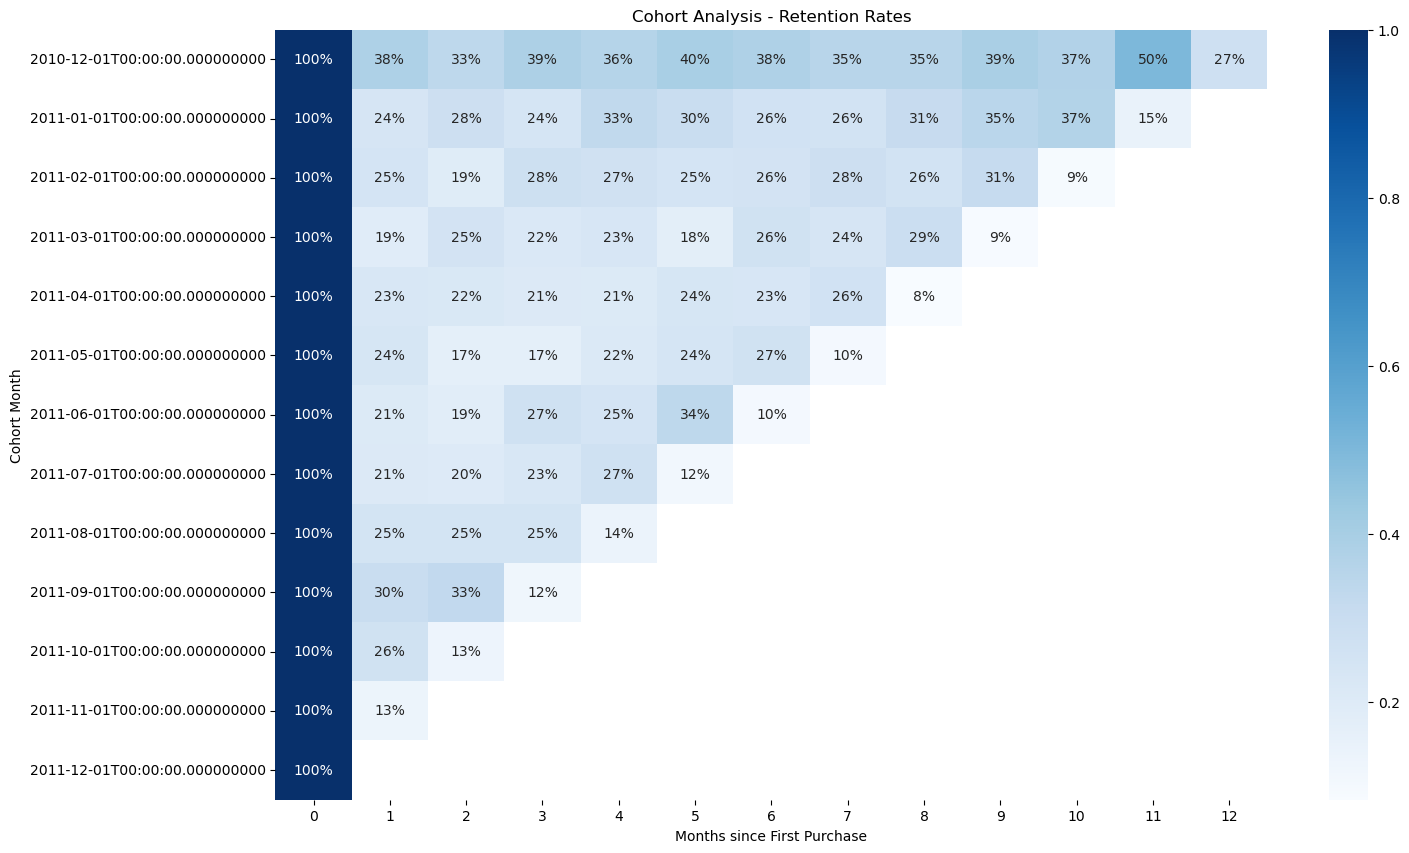

In [43]:
# Visualize the retention rates over time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Analysis - Retention Rates')
plt.xlabel('Months since First Purchase')
plt.ylabel('Cohort Month')
plt.show()

In [44]:
# Calculate retention rates by country
cohort_data = data.groupby(['Country', 'CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot_table(index=['Country', 'CohortMonth'], columns='CohortIndex', values='CustomerID')

# Calculate retention rates
cohort_size = cohort_pivot.iloc[:, 0]
retention_rate = cohort_pivot.divide(cohort_size, axis=0)

# Display the retention rates
print(retention_rate.head())


CohortIndex             0         1         2         3         4         5   \
Country   CohortMonth                                                          
Australia 2010-12-01   1.0  0.666667  0.333333  0.333333  0.333333  0.333333   
          2011-01-01   1.0  0.600000  0.400000  0.400000  0.200000  0.200000   
          2011-06-01   1.0       NaN       NaN       NaN       NaN       NaN   
Austria   2010-12-01   1.0       NaN       NaN       NaN  0.500000       NaN   
          2011-02-01   1.0       NaN  0.500000  0.500000       NaN       NaN   

CohortIndex                  6         7         8         9         10  \
Country   CohortMonth                                                     
Australia 2010-12-01   0.333333  0.333333  0.333333  0.333333  0.333333   
          2011-01-01   0.400000  0.200000  1.000000  0.200000  0.400000   
          2011-06-01        NaN       NaN       NaN       NaN       NaN   
Austria   2010-12-01        NaN       NaN  0.500000       NaN   